In [1]:
import pandas as pd
import numpy as np
import re
import os
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s:%(levelname)s : %(message)s', level=logging.INFO)

%matplotlib inline

In [2]:
def Data_Raw2Input (filename):
    df2 = pd.read_csv(filename, sep = '\t', header = None, compression='gzip')
    df2 = df2.iloc[:,[0,1,2,4]]
    df2 = df2.dropna()
    grouped3 = df2.groupby(2).apply(lambda x: ' '.join(list(x[4])))
    Input_Data = pd.DataFrame(grouped3)
    Input_Data = Input_Data.reset_index(drop = True)
    Input_Data = Input_Data.iloc[:,0].values
    corpus = []
    for line in Input_Data:
        words = [x for x in line.split(' ')]
        corpus.append(words)
    return corpus

In [ ]:
work_path = os.open('',os.O_RDONLY)
#work_path = '/home/mmde-lab/s3/59e875d818c7b/ss_bid_170511-180331/'
files = os.listdir(work_path)
os.fchdir(work_path)
files= sorted(files)
files = files[1:]
end_bid = files.index('')
files = files[:end_bid]
files_csv = list(filter(lambda x: x[-3:]=='.gz' , files))
files_csv


work_path2 = os.open('',os.O_RDONLY)
os.fchdir(work_path2)
print(os.getcwd())
list1 = []
for files in files_csv:
    corpus = (Data_Raw2Input('' + files))
    list1 = list1 + corpus
    print(files + 'finished ')

In [6]:
model = Word2Vec(iter=1,compute_loss = True, min_count = 2, size = 100, window = 2, workers = 6, sg = 1, hs = 0, negative = 10)
model.build_vocab(corpus)
#model.train(corpus, total_examples=model.corpus_count, epochs=model.iter)
model.get_latest_training_loss()
alpha = 0.025
alpha_delta = 0.001
passes = 51

loss_val_list = []
for epoch in range(passes):
    model.alpha, model.min_alpha = alpha, alpha
    model.train(corpus, total_examples=model.corpus_count, epochs=model.iter, compute_loss = True)
    alpha -= alpha_delta
    loss_val_list.append(model.get_latest_training_loss())
    print('------------------------------------')
    print('The loss of '+ str(epoch) + ' epoch is '+ str(model.get_latest_training_loss()))
    print('------------------------------------')

2019-01-15 17:27:47,743:INFO : collecting all words and their counts
2019-01-15 17:27:47,744:INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-01-15 17:27:47,968:INFO : PROGRESS: at sentence #10000, processed 1249880 words, keeping 123467 word types
2019-01-15 17:27:48,184:INFO : PROGRESS: at sentence #20000, processed 2427702 words, keeping 223397 word types
2019-01-15 17:27:48,408:INFO : PROGRESS: at sentence #30000, processed 3673432 words, keeping 318743 word types
2019-01-15 17:27:48,707:INFO : PROGRESS: at sentence #40000, processed 5304580 words, keeping 431015 word types
2019-01-15 17:27:48,743:INFO : collected 442716 word types from a corpus of 5502795 raw words and 41100 sentences
2019-01-15 17:27:48,743:INFO : Loading a fresh vocabulary
2019-01-15 17:27:49,746:INFO : min_count=2 retains 277471 unique words (62% of original 442716, drops 165245)
2019-01-15 17:27:49,746:INFO : min_count=2 leaves 5337550 word corpus (96% of original 5502795, drops 16

KeyboardInterrupt: 

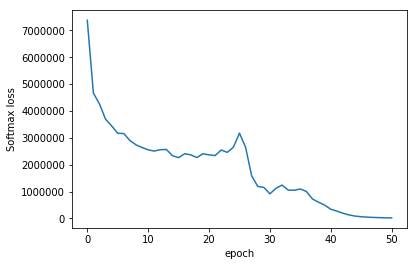

In [34]:
plt.plot(loss_val_list)
plt.xlabel('epoch')
plt.ylabel('Softmax loss')
plt.show()

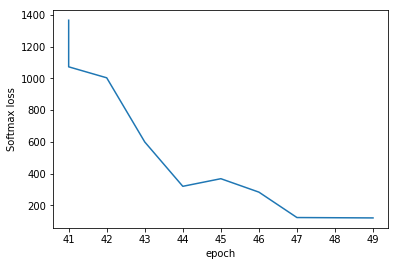

In [27]:
plt.plot([41,41,42,43,44,45,46,47,49],loss_val_list[-10:-1])
plt.xlabel('epoch')
plt.ylabel('Softmax loss')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import gc
import re
import MeCab

df_account = pd.read_csv(work_path + account_path, sep = '\t', compression='gzip')
df_order = pd.read_csv(work_path + order_path, sep = '\t', compression='gzip')
df_deal = pd.read_csv(work_path + deal_path, sep = '\t', compression='gzip')
df_dealprofile = pd.read_csv(work_path + deal_profile_path, sep = '\t', compression='gzip')

/home/mmde-lab/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/mmde-lab/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (9,14,15,51,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/mmde-lab/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10,13,26,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df_dealprofile.shape

(73965, 35)